## In-Class Assignment #4

In [31]:
### Imports
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
from pylab import *
from matplotlib.gridspec import GridSpec
#-matplotlib specifics
import matplotlib.mlab as mlab
import math
import random
%matplotlib inline

import itertools

from matplotlib.pyplot import figure, show
from matplotlib.image  import NonUniformImage
from matplotlib.ticker import AutoMinorLocator

minorLocator   = AutoMinorLocator(12)

#--------------------------------------------------
#...Allow for using TeX mode in matplotlib Figures
#--------------------------------------------------
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Computer Modern Roman']})
rc('text', usetex=True)
plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]
#Options
params = {'text.usetex' : True,
    'font.size' : 11,
        'font.family' : 'lmodern',
            'text.latex.unicode': True,
        }
plt.rcParams.update(params)
mpl.rcParams['axes.linewidth'] = 2.0
mpl.rcParams['xtick.major.size']=18      # major tick size in points
mpl.rcParams['xtick.minor.size']=9      # minor tick size in points
mpl.rcParams['ytick.major.size']=18      # major tick size in points
mpl.rcParams['ytick.minor.size']=9      # minor tick size in points
mpl.rcParams['xtick.major.width']=0.8      # major tick size in points
mpl.rcParams['xtick.minor.width']=0.6      # minor tick size in points
mpl.rcParams['ytick.major.width']=0.8      # major tick size in points
mpl.rcParams['ytick.minor.width']=0.6

##  Euler-Cromer method 

In [32]:
import ode

k= 1.
m = 1.

t0 = 0.
tf = 4.*np.pi
x0 = 0.
v0 = 1.

def force_1d(k,x):
    return -k*x

def total_energy_1d(m,x,v):
        return 0.5*k*(x**2.) + 0.5*m*(v**2.)
    

# This function performs a semi-implicit euler mehtod of
# integration for 1D hooke's law
#
# Returns: 
# [0] - time
# [1] - position 
# [2] - velocity
def ode_mp(x0,t0,v0,tf,dt,m,k):
    # initialize counter 
    i = 0
    
    # make arrays for computation 
    time = np.arange(t0,tf,dt)
    pos = np.zeros(len(time))
    vel = np.zeros(len(time))
    
    # intial conditions
    pos[0] = x0
    vel[0] = v0
    while i < len(time)-1: 
        pos_half = pos[i] + ((dt/2.)*(vel[i]))
        vel_half = vel[i] + ((dt/2.)*(force_1d(k,pos[i])/m))
        accel_half = force_1d(k,pos_half)/m 
        pos[i+1] = pos[i] + vel_half*dt
        vel[i+1] = vel[i] + accel_half*dt
        
        # update the counter
        i = i + 1
    return time,pos,vel


def ode_rk4(x0,t0,v0,tf,dt,m,k):
    # initialize counter 
    i = 0
    
    # make arrays for computation 
    time = np.arange(t0,tf,dt)
    pos = np.zeros(len(time))
    vel = np.zeros(len(time))
    
    # intial conditions
    pos[0] = x0
    vel[0] = v0
    while i < len(time)-1: 
        x1 = pos[i]
        v1 = vel[i]
        a1 = force_1d(k,x1)/m
        
        x2 = pos[i] + ((dt/2.)*(v1)) 
        v2 = vel[i] + ((dt/2.)*(a1)) 
        a2 = force_1d(k,x2)/m
        
        x3 = pos[i] + ((dt/2.)*(v2))
        v3 = vel[i] + ((dt/2.)*a2)
        a3 = force_1d(k,x3)/m
        
        x4 = pos[i] + (dt*v3)
        v4 = vel[i] + (dt*a3)
        a4 = force_1d(k,x4)/m
        
        pos[i+1] = pos[i] + (dt/6.)*((v1+2.*v2+2.*v3+v4))
        vel[i+1] = vel[i] + (dt/6.)*((a1+2.*a2+2.*a3+a4))
        
        # update the counter
        i = i + 1
    return time,pos,vel


In [33]:
# dt = 0.1\pi
test_euler_dt_0p1pi = ode.ode_euler(x0,t0,v0,tf,0.1*np.pi,m,k)

# dt = 0.01\pi
test_euler_dt_0p01pi = ode.ode_euler(x0,t0,v0,tf,0.01*np.pi,m,k)

# dt = 0.001\pi
test_euler_dt_0p001pi = ode.ode_euler(x0,t0,v0,tf,0.001*np.pi,m,k)

# dt = 0.1\pi
test_mp_dt_0p1pi = ode_mp(x0,t0,v0,tf,0.1*np.pi,m,k)

# dt = 0.01\pi
test_mp_dt_0p01pi = ode_mp(x0,t0,v0,tf,0.01*np.pi,m,k)

# dt = 0.001\pi
test_mp_dt_0p001pi = ode_mp(x0,t0,v0,tf,0.001*np.pi,m,k)

# dt = 0.1\pi
test_rk4_dt_0p1pi = ode_rk4(x0,t0,v0,tf,0.1*np.pi,m,k)

# dt = 0.01\pi
test_rk4_dt_0p01pi = ode_rk4(x0,t0,v0,tf,0.01*np.pi,m,k)

# dt = 0.001\pi
test_rk4_dt_0p001pi = ode_rk4(x0,t0,v0,tf,0.001*np.pi,m,k)

#plt.plot(test_rk4_dt_0p1pi[0],test_euler_dt_0p1pi[1])
#plt.plot(test_rk4_dt_0p1pi[0],test_rk4_dt_0p1pi[1])
#plt.show()

In [34]:
total_energy_1d_euler_dt_0p1pi = total_energy_1d(m,test_euler_dt_0p1pi[1],test_euler_dt_0p1pi[2])
total_energy_1d_euler_dt_0p01pi = total_energy_1d(m,test_euler_dt_0p01pi[1],test_euler_dt_0p01pi[2])
total_energy_1d_euler_dt_0p001pi = total_energy_1d(m,test_euler_dt_0p001pi[1],test_euler_dt_0p001pi[2])

total_energy_1d_mp_dt_0p1pi = total_energy_1d(m,test_mp_dt_0p1pi[1],test_mp_dt_0p1pi[2])
total_energy_1d_mp_dt_0p01pi = total_energy_1d(m,test_mp_dt_0p01pi[1],test_mp_dt_0p01pi[2])
total_energy_1d_mp_dt_0p001pi = total_energy_1d(m,test_mp_dt_0p001pi[1],test_mp_dt_0p001pi[2])

total_energy_1d_rk4_dt_0p1pi = total_energy_1d(m,test_rk4_dt_0p1pi[1],test_rk4_dt_0p1pi[2])
total_energy_1d_rk4_dt_0p01pi = total_energy_1d(m,test_rk4_dt_0p01pi[1],test_rk4_dt_0p01pi[2])
total_energy_1d_rk4_dt_0p001pi = total_energy_1d(m,test_rk4_dt_0p001pi[1],test_rk4_dt_0p001pi[2])

epsilon_0p1_euler = (np.abs(total_energy_1d_euler_dt_0p1pi[0]-total_energy_1d_euler_dt_0p1pi[-1]))/(total_energy_1d_euler_dt_0p1pi[0])
epsilon_0p01_euler = (np.abs(total_energy_1d_euler_dt_0p01pi[0]-total_energy_1d_euler_dt_0p01pi[-1]))/(total_energy_1d_euler_dt_0p01pi[0])
epsilon_0p001_euler = (np.abs(total_energy_1d_euler_dt_0p001pi[0]-total_energy_1d_euler_dt_0p001pi[-1]))/(total_energy_1d_euler_dt_0p001pi[0])

epsilon_0p1_mp = (np.abs(total_energy_1d_mp_dt_0p1pi[0]-total_energy_1d_mp_dt_0p1pi[-1]))/(total_energy_1d_mp_dt_0p1pi[0])
epsilon_0p01_mp = (np.abs(total_energy_1d_mp_dt_0p01pi[0]-total_energy_1d_mp_dt_0p01pi[-1]))/(total_energy_1d_mp_dt_0p01pi[0])
epsilon_0p001_mp = (np.abs(total_energy_1d_mp_dt_0p001pi[0]-total_energy_1d_mp_dt_0p001pi[-1]))/(total_energy_1d_mp_dt_0p001pi[0])

epsilon_0p1_rk4 = (np.abs(total_energy_1d_rk4_dt_0p1pi[0]-total_energy_1d_rk4_dt_0p1pi[-1]))/(total_energy_1d_rk4_dt_0p1pi[0])
epsilon_0p01_rk4 = (np.abs(total_energy_1d_rk4_dt_0p01pi[0]-total_energy_1d_rk4_dt_0p01pi[-1]))/(total_energy_1d_rk4_dt_0p01pi[0])
epsilon_0p001_rk4 = (np.abs(total_energy_1d_rk4_dt_0p001pi[0]-total_energy_1d_rk4_dt_0p001pi[-1]))/(total_energy_1d_rk4_dt_0p001pi[0])

epsilon_euler = np.array([epsilon_0p1_euler,epsilon_0p01_euler,epsilon_0p001_euler])
epsilon_mp = np.array([epsilon_0p1_mp,epsilon_0p01_mp,epsilon_0p001_mp])
epsilon_rk4 = np.array([epsilon_0p1_rk4,epsilon_0p01_rk4,epsilon_0p001_rk4])

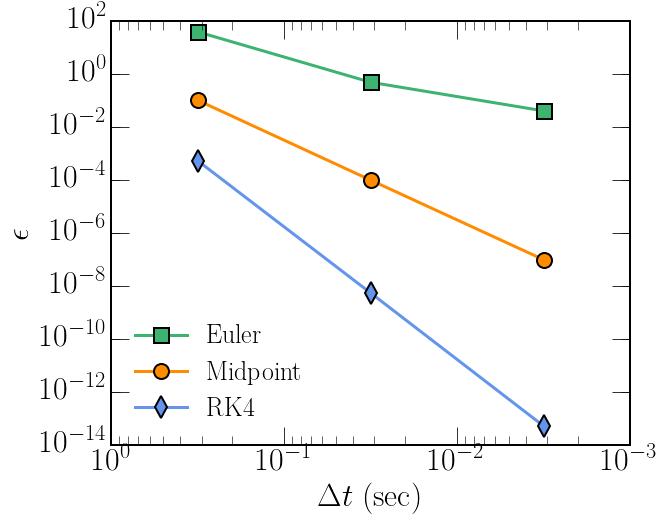

In [37]:
fig=plt.figure(figsize=(10,8),linewidth=5.0)
ax=fig.add_subplot(111)
ax.yaxis.set_major_locator(MaxNLocator(5))
ax.xaxis.set_major_locator(MaxNLocator(7))
ax.yaxis.set_minor_locator(AutoMinorLocator(10))
ax.xaxis.set_minor_locator(AutoMinorLocator(10))

dt_array = np.array([0.1*np.pi,0.01*np.pi,0.001*np.pi])

lines1 = plt.loglog(dt_array,epsilon_euler,'mediumseagreen',label=r'$\rm{Euler}$')
plt.setp(lines1,linewidth = 3,marker='s',markeredgewidth=2.0,ms=15.0,markerfacecolor='mediumseagreen',markevery=0.1)

lines2 = plt.loglog(dt_array,epsilon_mp,'darkorange',label=r'$\rm{Midpoint}$')
plt.setp(lines2,linewidth = 3,marker='o',markeredgewidth=2.0,ms=15.0,markerfacecolor='darkorange',markevery=0.1)

lines3 = plt.loglog(dt_array,epsilon_rk4,'cornflowerblue',label=r'$\rm{RK4}$')
plt.setp(lines3,linewidth = 3,marker='d',markeredgewidth=2.0,ms=15.0,markerfacecolor='cornflowerblue',markevery=0.1)

lns = lines1+lines2+lines3
labs = [l.get_label() for l in lns]

plt.xlim(1,1e-3)

#def flip(items, ncol):
#    return itertools.chain(*[items[i::ncol] for i in range(ncol)])
    
#handles, labels = ax.get_legend_handles_labels()
plt.legend(loc=3, ncol=1,fontsize=26,numpoints=1,fancybox=True, framealpha=0.0)

plt.xlabel(r'$\Delta t \ (\rm{sec})$',fontsize=32)
plt.ylabel(r'$\epsilon$',fontsize=32)
#plt.title(r'$\rm{Predictor-Corrector \ Method}$',fontsize = 26)
#plt.xlim(0.5,6.5)
#plt.axhline(22.2,linewidth=2.0,color='k',ls='--')
mpl.rcParams.update({'font.size': 32})
plt.tight_layout()
plt.savefig("./ica4_ex1_1.png")
plt.show()